<a href="https://colab.research.google.com/github/michaelfarayola7/Data-Science-ML-Projects/blob/main/Amazon_Employee_Access_CatBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon.com - Employee Access Challenge

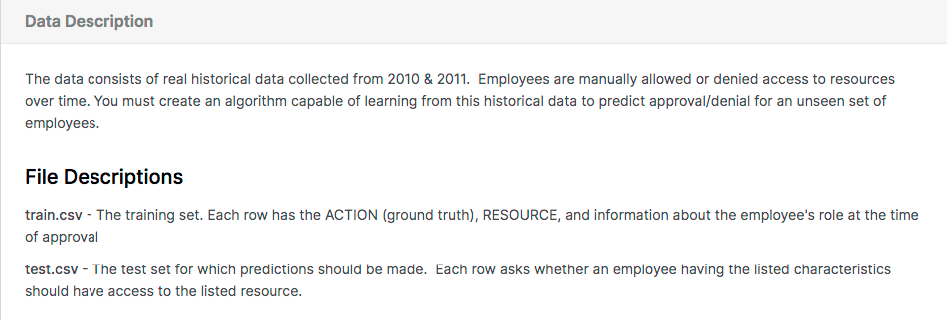

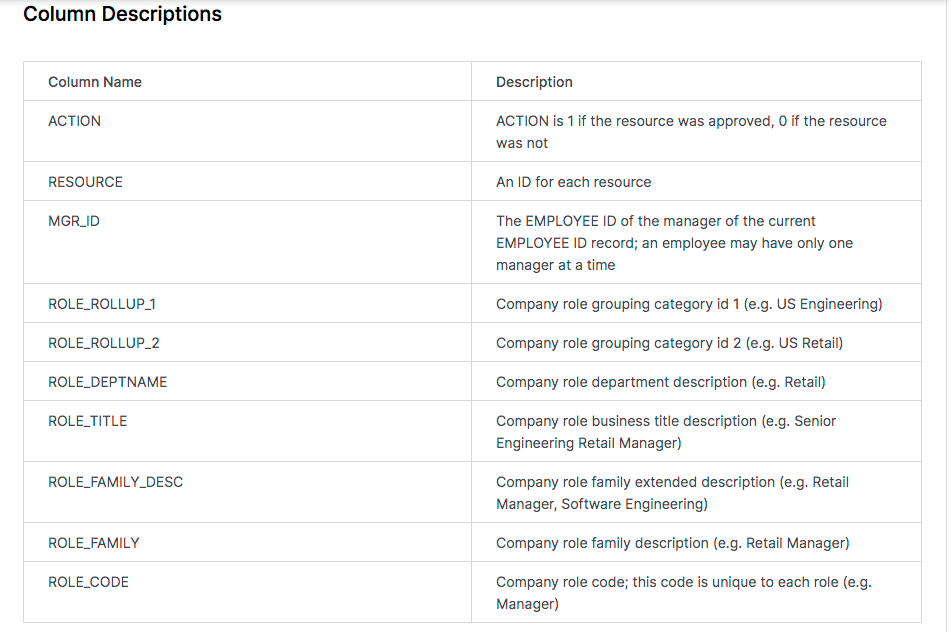

In [1]:
!pip install pyforest
from pyforest import *
lazy_imports()

['from dask import dataframe as dd',
 'import fbprophet',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'from statsmodels.tsa.arima_model import ARIMA',
 'import torch',
 'from sklearn.linear_model import Ridge',
 'import plotly.express as px',
 'import matplotlib.pyplot as plt',
 'from openpyxl import load_workbook',
 'from pathlib import Path',
 'import dash',
 'import os',
 'import textblob',
 'from sklearn.manifold import TSNE',
 'from sklearn.preprocessing import PolynomialFeatures',
 'from scipy import signal as sg',
 'import statsmodels.api as sm',
 'import sys',
 'import plotly.graph_objs as go',
 'from sklearn import metrics',
 'import bokeh',
 'import tqdm',
 'from sklearn.model_selection import KFold',
 'import nltk',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'from sklearn.preprocessing import MinMaxScaler',
 'from sklearn.linear_model import LassoCV',
 'from sklearn.model_selection import StratifiedKFold',
 'from PIL import Image',
 'imp

In [2]:
train=pd.read_csv("amazontrain.csv")

<IPython.core.display.Javascript object>

In [3]:
test=pd.read_csv("amazontest.csv")

<IPython.core.display.Javascript object>

In [4]:
train.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [5]:
train.shape

(32769, 10)

In [6]:
test.shape

(58921, 10)

In [7]:
test.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


<br>
<br>

# **CatBoost**



CatBoost is an algorithm for gradient boosting on decision trees. It is developed by Yandex researchers and engineers, and is used for search, recommendation systems, personal assistant, self-driving cars, weather prediction and many other tasks at Yandex and in other companies, including CERN, Cloudflare, Careem taxi. It is in open-source and can be used by anyone.


Procedure for other gradient boosting algorithms (XG boost, Light GBM)
Step 1: Consider all (or a sample ) the data points to train a highly biased model.

Step 2: Calculate residuals (errors) for each data point.

Step 3: Train another model with the same data points and corresponding residuals (errors) as class labels.

Step 4: Repeat Step 2 & Step 3 ( for n iterations).

This procedure is prone to overfitting, because we are calculating residuals of each data point by using the model that has already been trained on same set of data points.

<br>

**Advantages of CatBoost Library**

**Performance:**

CatBoost provides state of the art results and it is competitive with any leading machine learning algorithm on the performance front.

**Handling Categorical features automatically:**

We can use CatBoost without any explicit pre-processing to convert categories into numbers. CatBoost converts categorical values into numbers using various statistics on combinations of categorical features and combinations of categorical and numerical features. You can read more about it here.

**Robust:**

It reduces the need for extensive hyper-parameter tuning and lower the chances of overfitting also which leads to more generalized models. Although, CatBoost has multiple parameters to tune and it contains parameters like the number of trees, learning rate, regularization, tree depth, fold size, bagging temperature and others. You can read about all these parameters here.

**Easy-to-use:** You can use CatBoost from the command line, using an user-friendly API for both Python and R.


*Reference for Gradient Boosting* : https://bit.ly/2LOJQYD

In [8]:
!pip install catboost

In [9]:
# Loading data directly from CatBoost
from catboost.datasets import amazon

traindf, testdf = amazon()

In [10]:
traindf.shape

(32769, 10)

In [11]:
testdf.shape

(58921, 10)

In [12]:
traindf.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


<br>

**ACTION** is our target column

<br>

In [13]:
testdf.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


In [14]:
traindf.apply(lambda x: x.nunique())

ACTION                 2
RESOURCE            7518
MGR_ID              4243
ROLE_ROLLUP_1        128
ROLE_ROLLUP_2        177
ROLE_DEPTNAME        449
ROLE_TITLE           343
ROLE_FAMILY_DESC    2358
ROLE_FAMILY           67
ROLE_CODE            343
dtype: int64

In [15]:
traindf['MGR_ID'].value_counts()

770      152
2270      99
2594      82
1350      71
2014      67
        ... 
97000      1
81506      1
12517      1
50296      1
22355      1
Name: MGR_ID, Length: 4243, dtype: int64

## Distribution of Features

**Distplot**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1000x800 with 0 Axes>

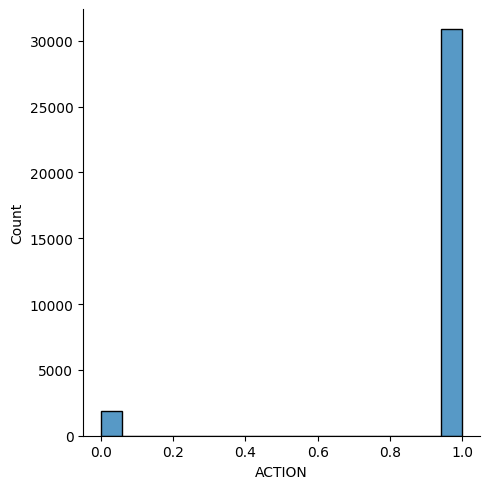

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

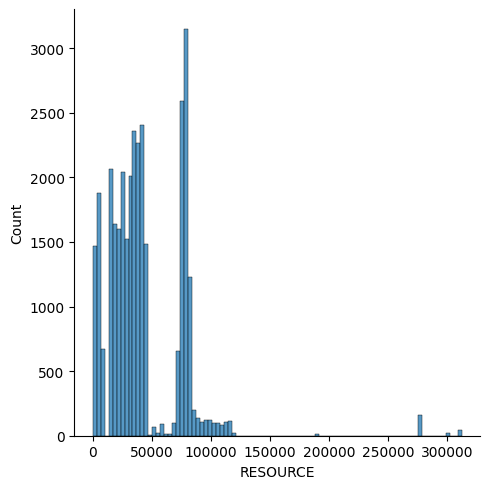

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

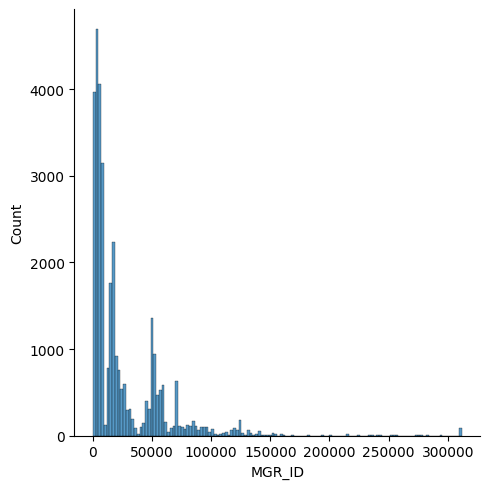

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

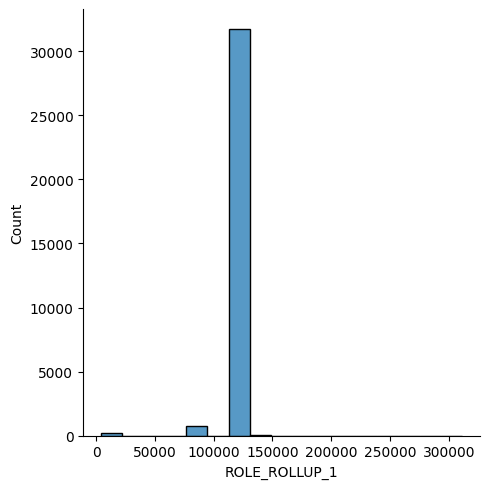

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

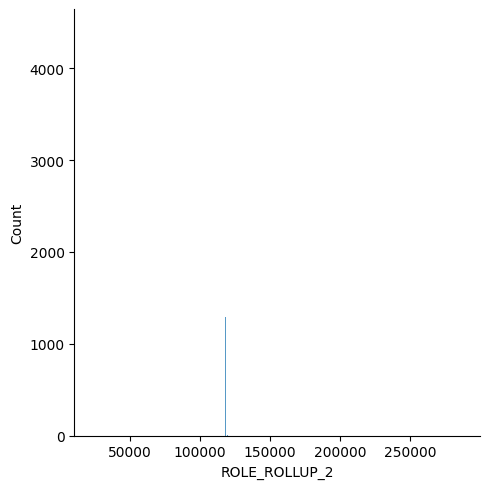

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

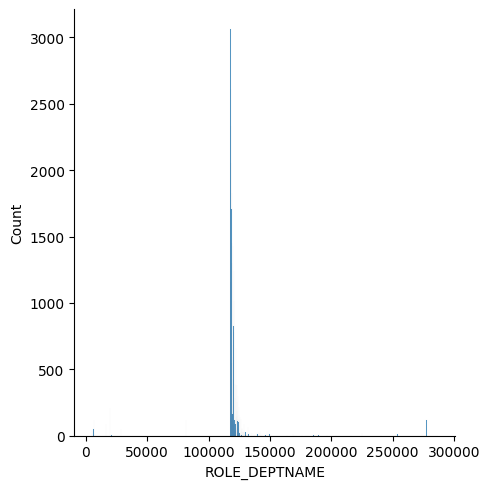

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

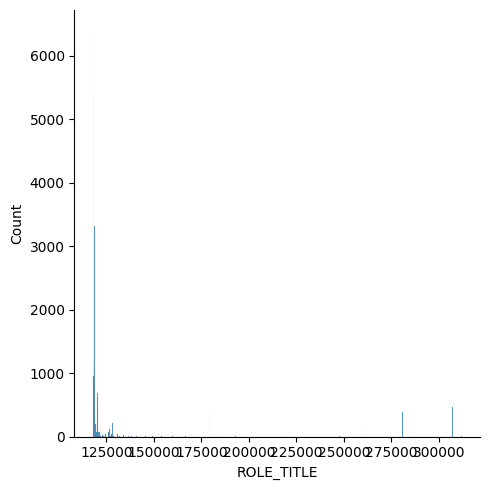

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

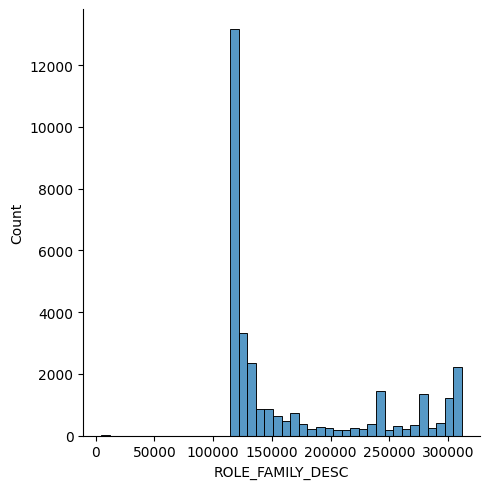

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

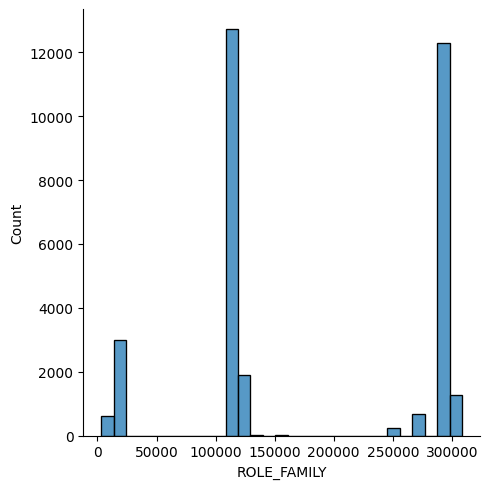

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

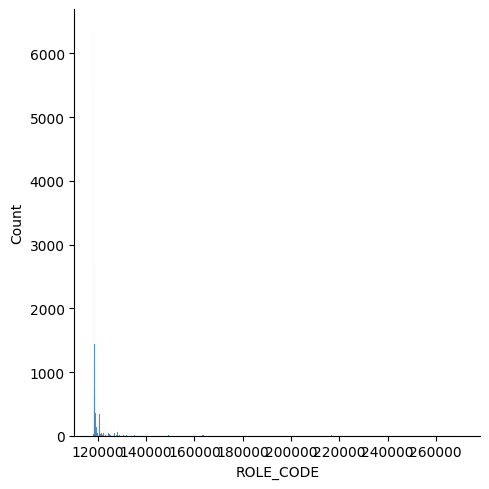

In [16]:
plt.figure(figsize=(10,8))
for i in traindf.describe().columns:
  sns.displot(traindf[i].dropna())
  plt.show()

## Boxplot

In [17]:
traindf['ACTION'].value_counts()

1    30872
0     1897
Name: ACTION, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

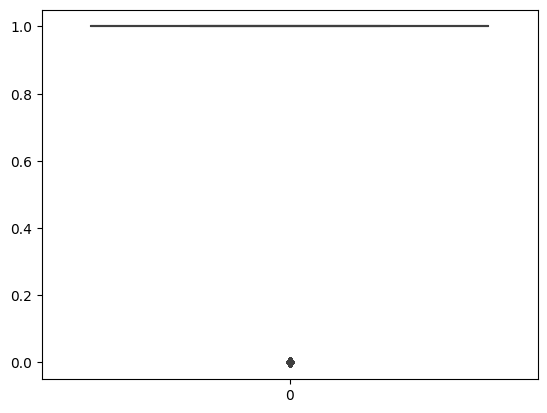

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

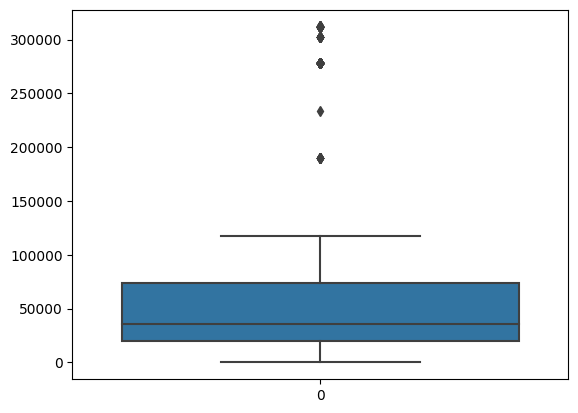

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

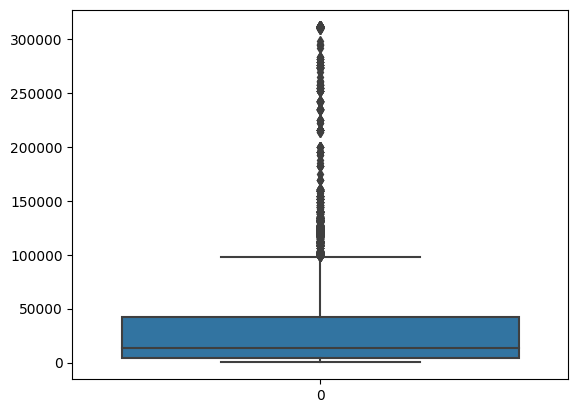

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

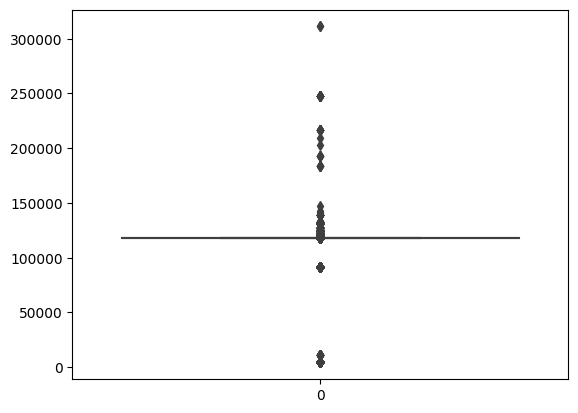

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

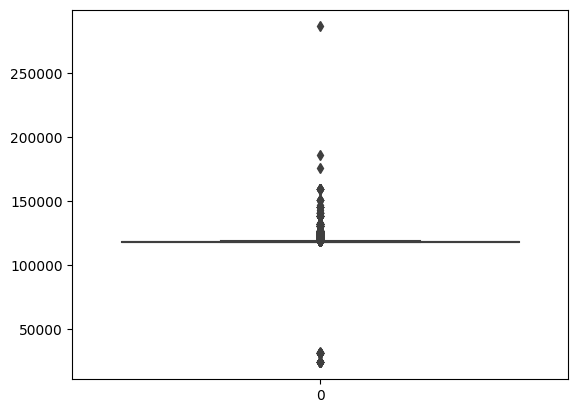

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

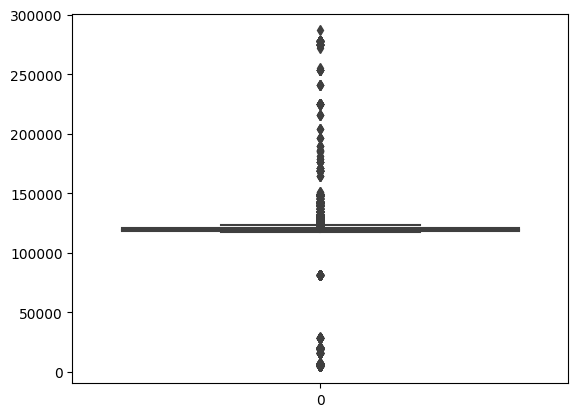

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

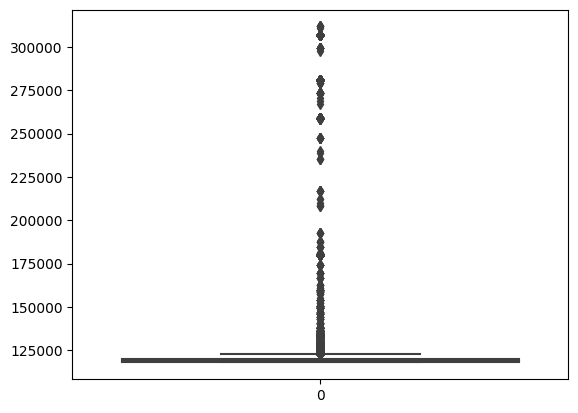

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

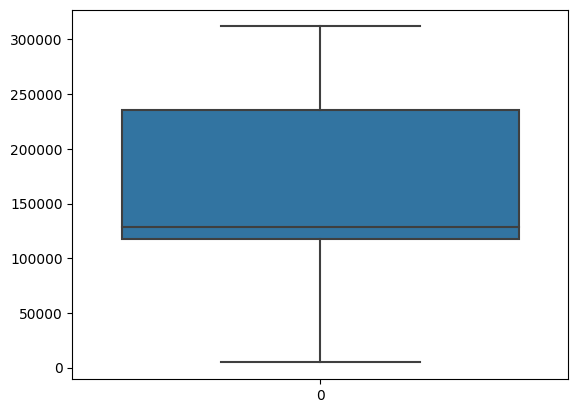

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

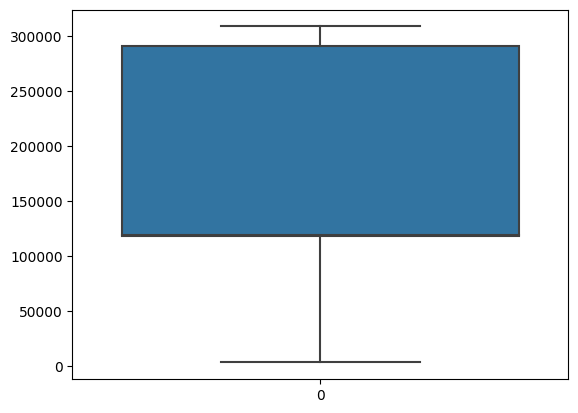

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

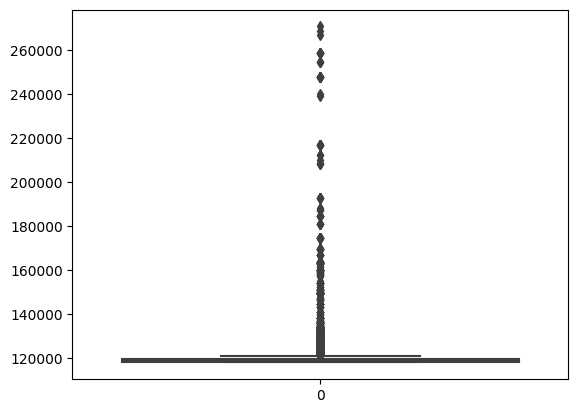

In [18]:
for i in traindf.describe().columns:
    sns.boxplot(traindf[i].dropna())
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

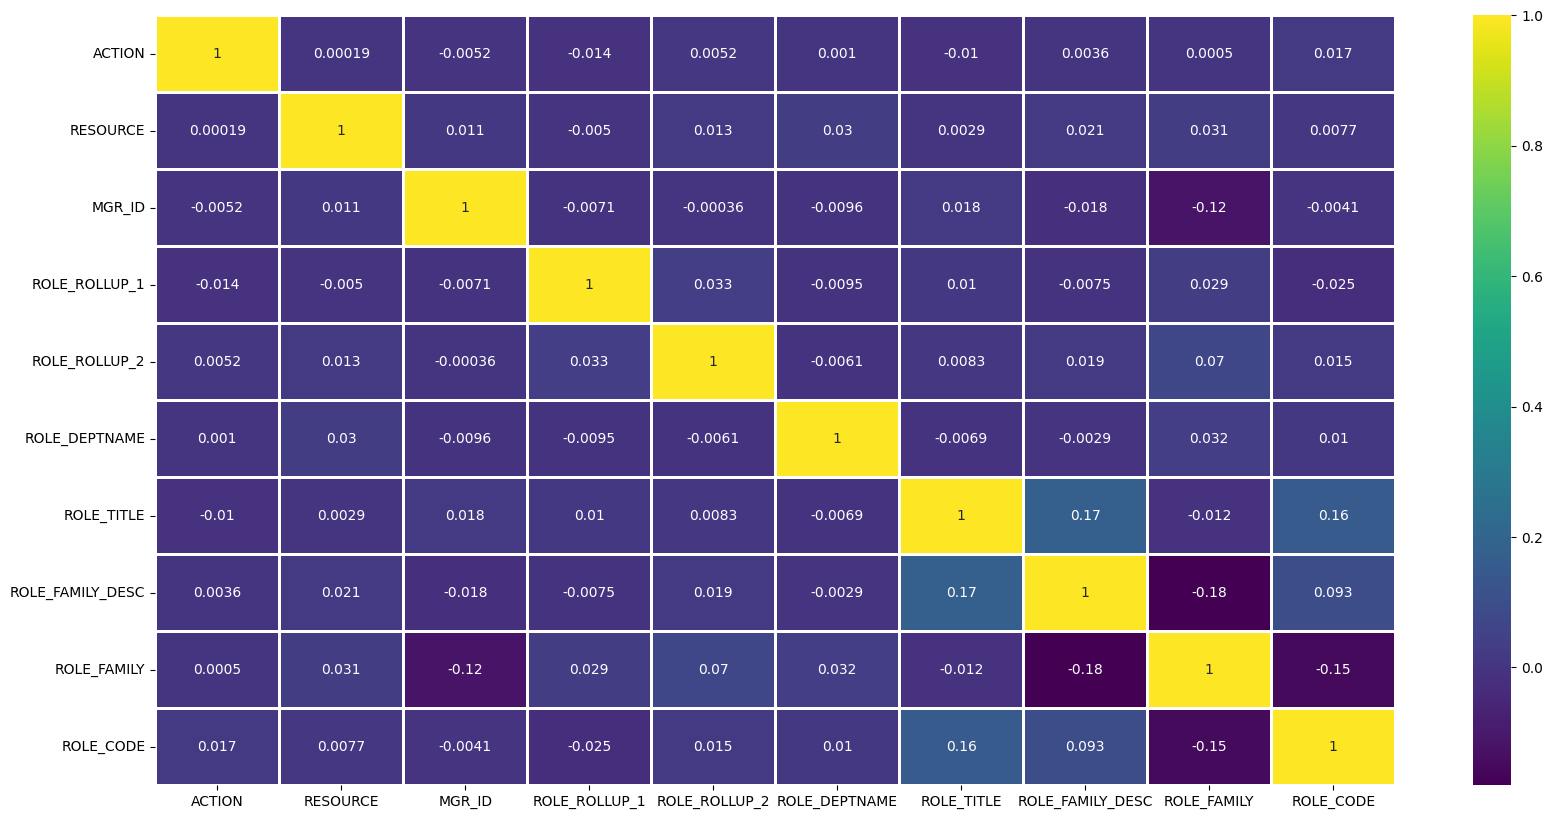

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(traindf.corr(),annot=True,cmap='viridis',linewidth=1)

In [20]:
traindf.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [21]:
testdf.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


# Model Building

In [22]:
y = traindf['ACTION']

X = traindf.drop('ACTION',axis=1)

X_test = testdf.drop('id',axis=1)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=1)

In [24]:
from catboost import CatBoostClassifier

In [25]:
%%time

params = {"depth":4,
          "learning_rate":0.1,
          "loss_function":'Logloss',
          'eval_metric':'AUC',
          'verbose':200,
          'random_seed':1}

catmodel_1 = CatBoostClassifier(**params)

catmodel_1.fit(X_train, y_train, # data to train on (required parameters, unless we provide X as a pool object, will be shown below)
          eval_set=(X_valid, y_valid), # data to validate on
          use_best_model=True, # True if we don't want to save trees created after iteration with the best validation score
         );

0:	test: 0.5125044	best: 0.5125044 (0)	total: 54.8ms	remaining: 54.8s
200:	test: 0.7681453	best: 0.7681574 (199)	total: 1.6s	remaining: 6.36s
400:	test: 0.7997890	best: 0.7997890 (400)	total: 3.1s	remaining: 4.63s
600:	test: 0.8149108	best: 0.8149108 (600)	total: 6.6s	remaining: 4.38s
800:	test: 0.8214605	best: 0.8214605 (800)	total: 8.26s	remaining: 2.05s
999:	test: 0.8256310	best: 0.8263510 (983)	total: 9.7s	remaining: 0us

bestTest = 0.8263510096
bestIteration = 983

Shrink model to first 984 iterations.
CPU times: user 14 s, sys: 933 ms, total: 14.9 s
Wall time: 9.9 s


In [26]:
categorical_features = list(range(X.shape[1]))
print(categorical_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8]


In [27]:
%%time

params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'cat_features': categorical_features,
          'verbose': 200,
          'random_seed': 1
         }
catmodel = CatBoostClassifier(**params)
catmodel.fit(X_train, y_train,
          eval_set=(X_valid, y_valid),
          use_best_model=True);


Learning rate set to 0.069882
0:	test: 0.5637606	best: 0.5637606 (0)	total: 80.9ms	remaining: 1m 20s
200:	test: 0.8955617	best: 0.8955872 (198)	total: 13.6s	remaining: 54s
400:	test: 0.8985912	best: 0.8987220 (386)	total: 28.3s	remaining: 42.3s
600:	test: 0.9004468	best: 0.9005457 (595)	total: 47.3s	remaining: 31.4s
800:	test: 0.8997008	best: 0.9007469 (631)	total: 1m 2s	remaining: 15.4s
999:	test: 0.8985767	best: 0.9007469 (631)	total: 1m 16s	remaining: 0us

bestTest = 0.9007468588
bestIteration = 631

Shrink model to first 632 iterations.
CPU times: user 2min 2s, sys: 2.53 s, total: 2min 5s
Wall time: 1min 17s


<br>

### Cross Validation

In [28]:
#pool = multiprocessing.Pool()

In [29]:
import multiprocessing
from catboost import cv, Pool

params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'verbose': 200,
          'random_seed':1}

# pool for Dataset processing.

total_train_data = Pool(data = X, label = y, cat_features = categorical_features)

scores = cv(total_train_data,
            params=params,
            fold_count=4,
            seed=1,
            shuffle=True,
            stratified=True, # if True the folds are made by preserving the percentage of samples for each class
           )

Training on fold [0/4]
0:	test: 0.5000000	best: 0.5000000 (0)	total: 21.4ms	remaining: 21.4s
200:	test: 0.8948050	best: 0.8948050 (200)	total: 13.1s	remaining: 52.1s
400:	test: 0.8993043	best: 0.8993043 (400)	total: 28.2s	remaining: 42.1s
600:	test: 0.9019037	best: 0.9019037 (600)	total: 45.1s	remaining: 29.9s
800:	test: 0.9027905	best: 0.9031492 (781)	total: 1m 2s	remaining: 15.5s
999:	test: 0.9036792	best: 0.9036792 (999)	total: 1m 19s	remaining: 0us

bestTest = 0.9036791642
bestIteration = 999

Training on fold [1/4]
0:	test: 0.5000000	best: 0.5000000 (0)	total: 18.5ms	remaining: 18.5s
200:	test: 0.8835559	best: 0.8840146 (166)	total: 12.9s	remaining: 51.4s
400:	test: 0.8852191	best: 0.8853875 (382)	total: 27.8s	remaining: 41.6s
600:	test: 0.8859059	best: 0.8859447 (591)	total: 43.4s	remaining: 28.8s
800:	test: 0.8860087	best: 0.8865844 (746)	total: 58.9s	remaining: 14.6s
999:	test: 0.8841890	best: 0.8865844 (746)	total: 1m 15s	remaining: 0us

bestTest = 0.8865843778
bestIteration =

In [30]:
feature_imp = catmodel.get_feature_importance(prettified=True) #prettified helps to get the features in a dataframe
feature_imp

,Feature Id,Importances
0,RESOURCE,19.191502
1,ROLE_DEPTNAME,15.756340
2,MGR_ID,15.621862
3,ROLE_ROLLUP_2,13.129965
4,ROLE_FAMILY_DESC,10.059007
5,ROLE_TITLE,7.790703
6,ROLE_FAMILY,6.412647
7,ROLE_ROLLUP_1,6.224750
8,ROLE_CODE,5.813223


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

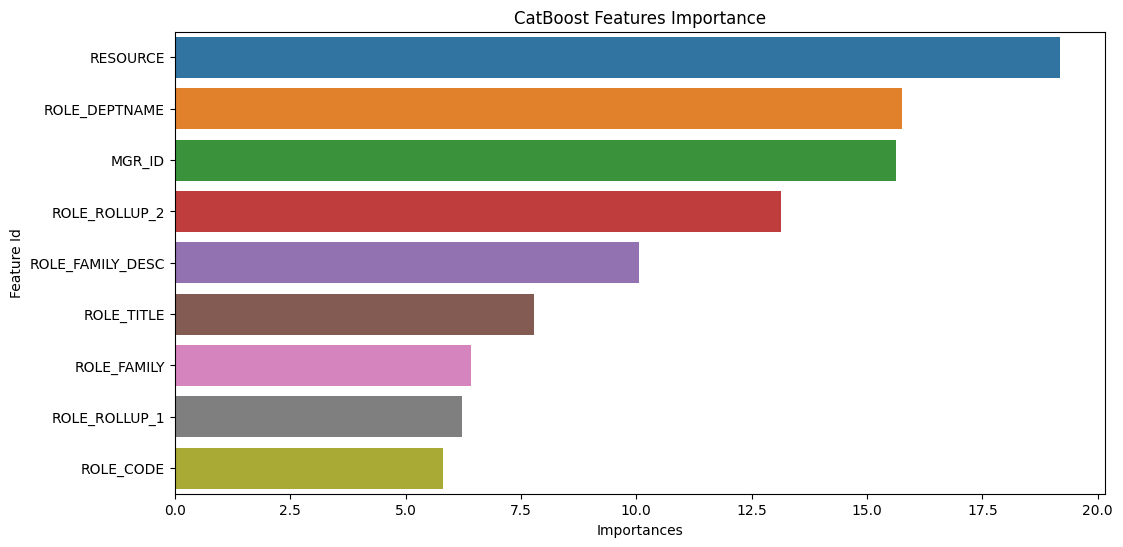

In [31]:
plt.figure(figsize=(12,6))

sns.barplot(x = 'Importances', y = 'Feature Id', data = feature_imp);
plt.title("CatBoost Features Importance")
plt.show()

In [32]:
predictions = catmodel.predict_proba(X_test)

In [33]:
predictions

array([[0.22869066, 0.77130934],
       [0.01378504, 0.98621496],
       [0.00616092, 0.99383908],
       ...,
       [0.00909481, 0.99090519],
       [0.06097107, 0.93902893],
       [0.01370489, 0.98629511]])

In [34]:
predictions=catmodel.predict(X_test)
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [35]:
catmodel.score(X_valid, y_valid)

0.9571585499816917

**IMPORTANT**

Note that our target column (**ACTION**) contains **30872** 1s and only **1897** 0s. This is an indication of data imbalance. You can deal with this and use the same steps above to build the algorithm.

If you are not familiar with how to deal with **data imbalance**, look at the **Credit Card Fraud Detection** project to get to know how to solve this.

In [36]:
traindf['ACTION'].value_counts()

1    30872
0     1897
Name: ACTION, dtype: int64